In [1]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv  
from langchain_core.messages import BaseMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

c:\Users\mawiy\OneDrive\Desktop\Legal-Agent\myLegal\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [41]:
load_dotenv()
from langchain_community.tools.tavily_search import TavilySearchResults
search_tool = TavilySearchResults(max_results= 2)
model = ChatGoogleGenerativeAI(model='gemini-2.5-flash').bind_tools([search_tool])




In [42]:
class AgentSatta(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

def model_call(state:AgentSatta) -> AgentSatta:
    system_prompt =SystemMessage(content='you are a helpful assistant answer the query')
    response = model.invoke([system_prompt]+state['messages'])
    return {'messages':[response]}



In [43]:
def should_continue(state:AgentSatta)->AgentSatta:
    messages= state['messages']
    last_message = messages[-1]
    if not last_message.tool_calls:
        return 'end'
    else:
        return 'continue'

In [44]:
graph = StateGraph(AgentSatta)
graph.add_node("our_agent",model_call)
tool_node = ToolNode(tools=[search_tool])
graph.add_node('tool',tool_node)

graph.set_entry_point('our_agent')


In [45]:
graph.add_conditional_edges(
    'our_agent',
    should_continue,{
        "end":END,
        'continue':'tool'
    },
)

graph.add_edge('tool',"our_agent")

app = graph.compile()

In [48]:
inputs = {"messages": [("user", "Search for mawiya manzar . Also tell me a joke please.")]}
r=app.invoke(input=inputs)
print(r['messages'][-1].content)


[{'type': 'text', 'text': "Mu'awiya I (c. 597–680 AD) was the founder and first caliph of the Umayyad Caliphate, ruling from 661 until his death. He became caliph less than thirty years after the death of the Islamic prophet Muhammad. Unlike his predecessors, he was a relatively late follower of Muhammad. Mu'awiya was the first caliph whose name appeared on coins, inscriptions, or documents of the nascent Islamic empire. Some modern historians have questioned his commitment to Islam, suggesting he may have adhered to a non-confessional monotheism or even been a Christian. Sunni Muslim tradition honors him as a companion of Muhammad and a scribe of Qur'anic revelation, while Shia Islam reviles him for opposing Ali.\n\nHere's a joke for you: Why don't scientists trust atoms? Because they make up everything!", 'extras': {'signature': 'CpoGAdHtim+ipTbff3kEOUnp+1KLDB/78Y2eP71fboyDVE8+YgN/TIyT9udu0SJ63sKzrAZYaGUdDampeywRnU34p75heIS92vEYlVVT0NluBjjXLU35IvkiXYnKE2rJh/ed+OEt05NkT9F8mYjc6xjNF1vf

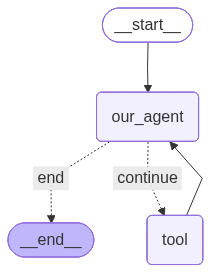

In [49]:
app

In [47]:
{'messages': [HumanMessage(content='Search for mawiya manzar. Also tell me a joke please.', additional_kwargs={}, response_metadata={}, id='eb471183-8769-4f1c-b8d6-cdd43929a86a'), AIMessage(content='Okay, I can help with that!\n\nRegarding **Mawiya Manzar**:\nA direct search for "Mawiya Manzar" doesn\'t immediately bring up a widely known public figure or a prominent entry in general knowledge databases. It\'s possible this is:\n*   An individual who is not widely famous.\n*   A name from a specific local context (e.g., a community leader, a local artist, a student, etc.).\n*   A name with a specific spelling variation that might yield different results.\n\nIf you have more information about **Mawiya Manzar** (e.g., their profession, what they are known for, their field of work, or where you encountered the name), I might be able to find more specific details for you!\n\n---\n\nAnd now for a joke:\n\nWhy don\'t scientists trust atoms?\nBecause they make up everything!', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--42201e26-f8f1-48e7-a90c-7f3c80441722-0', usage_metadata={'input_tokens': 23, 'output_tokens': 456, 'total_tokens': 479, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 268}})]}

NameError: name 'HumanMessage' is not defined